## Predicciones

In [60]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [61]:
from src.exploring_functions import *

## Logistic regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [63]:
medidas = pd.read_csv('./data/measurements_clean.csv')
medidas = pd.get_dummies(medidas, columns=['gas_type'])
donwcast_df(medidas, verbose=0)

In [64]:
X, y = medidas.drop(columns=['consume', 'gas_type_SP98', 'gas_type_E10']), medidas.gas_type_SP98

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

El modelo que se va a emplear es la regresion logística, que permite predecir que tipo de combustible usa un coche en función de los datos que se dan

In [65]:
modelo = LogisticRegression().fit(X_train, y_train)

/home/rodrigo/miniconda3/envs/ironhack/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
logreg=LogisticRegression(tol=0.0001, 
                          max_iter=70,
                          solver='lbfgs', 
                          multi_class='multinomial',)

logreg.fit(X=X_train, y=y_train)
y_pred=logreg.predict(X=X_test)
train_score=logreg.score(X_train, y_train)  
test_score=logreg.score(X_test, y_test)

print(logreg)
print('Train:', train_score)
print('Test:', test_score) 

LogisticRegression(max_iter=70, multi_class='multinomial')
Train: 0.6333333333333333
Test: 0.5


/home/rodrigo/miniconda3/envs/ironhack/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


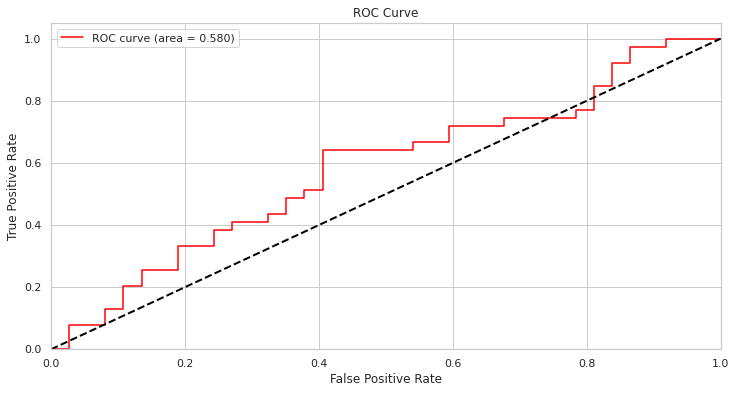

In [67]:
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="upper left")
plt.show()

Se comprueba como la curva ROC nos da la información de que el modelo es prácticamente aleatorio a la hora de predecir que tipo de combustible lleva un coche. Esto puede indicar dos cosas:
* Que el la regresión logística no es un modelo adecuado para predecir en este caso
* Que con los datos que tenemos no se puede predecir si un coche lleva un tipo de combustible u otro, lo que indicaría que no hay una diferencia entre ambos grupos

Se va a intentar predecir el tipo de combustible con un modelo de RANDOM FOREST

## Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [69]:
medidas = pd.read_csv('./data/measurements_clean.csv')
donwcast_df(medidas, verbose=0)

In [70]:
rfr=RFR()
y_data = medidas['consume']
x_data = medidas.drop('consume', axis=1)
X_data = x_data.drop(columns = ['gas_type','temp_inside'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [71]:
y_pred=rfr.predict(X_test)

y_pred[:10]

array([4.02099999, 4.54200006, 5.49799987, 3.87957616, 4.10799997,
       4.40700001, 4.90299998, 4.91499999, 6.66390013, 9.68099991])

In [72]:
train_score=rfr.score(X_train, y_train)  
test_score=rfr.score(X_test, y_test)

print('Train rfr:', train_score)
print('Test rfr:', test_score) 

Train rfr: 0.9346741842931301
Test rfr: 0.6326711094524495


Al igual que en el caso de la regresión logistica, random forest no consigue predecir con fiabilidad el combustible de los diferentes trayectos, esto nos indica que el gas utilizado no es una variable especialmente relevante en el consumo. 

## Conclusiones

- No se puede predecir el combustible usado por un coche a partir del consumo.
- Las variables más relevantes para el consumo es la temperatura exterior y si habia o no lluvia en el trayecto.
- Viendo que el consumo es similar sin tener en cuenta el combustible usado, seria interesante mirar los precios y elegir el combustible más barato